생활권 도시림/도시림 데이터 출처   
* http://index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=2808 

In [ ]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import folium
import json
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,516 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
df=pd.read_excel('연도별 도시림 현황(05-19).xls')

'''
#에러 해결 중
def remake(a,b,c,d): #df_2005, '2005', '2005.1', '2005.2'
  a=df[['Unnamed: 0', b, c, d]]
  a.rename(columns=a.iloc[0], inplace=True)
  a.drop(0, inplace=True)
  a['연도']=b
  return 

df_2005=remake('df_2005', '2005', '2005.1', '2005.2')
df_2007=remake(df_2007, '2007', '2007.1', '2007.2')
df_2009=remake(df_2009, '2009', '2009.1', '2009.2')
df_2011=remake(df_2011, '2011', '2011.1', '2011.2')
df_2013=remake(df_2013, '2013', '2013.1', '2013.2')
df_2015=remake(df_2015, '2015', '2015.1', '2015.2')
df_2017=remake(df_2017, '2017', '2017.1', '2017.2')
df_2019=remake(df_2019, '2019', '2019.1', '2019.2')
'''

df_2005=df.loc[:,('Unnamed: 0', '2005', '2005.1', '2005.2')]
df_2005.rename(columns=df_2005.iloc[0], inplace=True)
df_2005.drop(0, inplace=True)
df_2005['연도']=2005

df_2007=df[['Unnamed: 0', '2007', '2007.1', '2007.2']]
df_2007.rename(columns=df_2007.iloc[0], inplace=True)
df_2007.drop(0, inplace=True)
df_2007['연도']=2007

df_2009=df[['Unnamed: 0', '2009', '2009.1', '2009.2']]
df_2009.rename(columns=df_2009.iloc[0], inplace=True)
df_2009.drop(0, inplace=True)
df_2009['연도']=2009

df_2011=df[['Unnamed: 0', '2011', '2011.1', '2011.2']]
df_2011.rename(columns=df_2011.iloc[0], inplace=True)
df_2011.drop(0, inplace=True)
df_2011['연도']=2011

df_2013=df[['Unnamed: 0', '2013', '2013.1', '2013.2']]
df_2013.rename(columns=df_2013.iloc[0], inplace=True)
df_2013.drop(0, inplace=True)
df_2013['연도']=2013

df_2015=df[['Unnamed: 0', '2015', '2015.1', '2015.2']]
df_2015.rename(columns=df_2015.iloc[0], inplace=True)
df_2015.drop(0, inplace=True)
df_2015['연도']=2015

df_2017=df[['Unnamed: 0', '2017', '2017.1', '2017.2']]
df_2017.rename(columns=df_2017.iloc[0], inplace=True)
df_2017.drop(0, inplace=True)
df_2017['연도']=2017

df_2019=df[['Unnamed: 0', '2019', '2019.1', '2019.2']]
df_2019.rename(columns=df_2019.iloc[0], inplace=True)
df_2019.drop(0, inplace=True)
df_2019['연도']=2019


df=pd.concat([df_2005, df_2007, df_2009, df_2011, df_2013, df_2015, df_2017, df_2019], axis=0)
df.reset_index(inplace=True, drop=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykerne

,시도,생활권도시림,1인당도시림,1인당생활권도시림,연도
0,합계,29400,611.02,6.56,2005
1,서울특별시,4968,14.53,5.06,2005
2,부산광역시,2513,74.48,7.17,2005
3,광주광역시,591,137.39,4.17,2005
4,대구광역시,1382,89.19,5.7,2005
...,...,...,...,...,...
139,전라북도,2850,336.9,19.88,2019
140,전라남도,2883,852.67,22.05,2019
141,경상북도,3074,790.3,15.4,2019
142,경상남도,4487,272.99,16.89,2019


# 생활권 도시림 

In [ ]:
df_aforest=pd.pivot_table(df, index=['시도', '연도'], values=['생활권도시림'], aggfunc='sum')
df_aforest.reset_index(inplace=True)
df_aforest

,시도,연도,생활권도시림
0,강원도,2005,1252
1,강원도,2007,1293
2,강원도,2009,1677.14
3,강원도,2011,1904
4,강원도,2013,2287
...,...,...,...
139,합계,2011,36319
140,합계,2013,38513
141,합계,2015,46219
142,합계,2017,47318


### 시계열

In [ ]:
px.line(df_aforest, x='연도', y='생활권도시림', color='시도')

In [ ]:
df_aforest_total=df_aforest[df_aforest['시도']=='합계']

fig = px.line(
    df_aforest_total, x='연도', y='생활권도시림'
)
fig.show()

### 2019년

In [ ]:
df_aforest19=df_aforest[df_aforest['시도']!= '합계']
df_aforest19=df_aforest19[df_aforest19['연도']==2019]

plus=[42,41,48,47,29,27,30,26,11,36,31,28,46,45,50,44,43]

df_aforest19['CTPRVN_CD']=plus
df_aforest19

,시도,연도,생활권도시림,CTPRVN_CD
7,강원도,2019,2506,42
15,경기도,2019,10462,41
23,경상남도,2019,4487,48
31,경상북도,2019,3074,47
39,광주광역시,2019,1791,29
47,대구광역시,2019,3021,27
55,대전광역시,2019,1658,30
63,부산광역시,2019,4525,26
71,서울특별시,2019,6685,11
79,세종특별자치시,2019,622,36


In [ ]:
df_aforest19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 7 to 135
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도         17 non-null     object
 1   연도         17 non-null     int64 
 2   생활권도시림     17 non-null     object
 3   CTPRVN_CD  17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 680.0+ bytes


In [ ]:
df_aforest19['생활권도시림']=df_aforest19['생활권도시림'].astype(float)
df_aforest19=df_aforest19.set_index('시도')
df_aforest19

,연도,생활권도시림,CTPRVN_CD
시도,,,
강원도,2019,2506.0,42
경기도,2019,10462.0,41
경상남도,2019,4487.0,48
경상북도,2019,3074.0,47
광주광역시,2019,1791.0,29
대구광역시,2019,3021.0,27
대전광역시,2019,1658.0,30
부산광역시,2019,4525.0,26
서울특별시,2019,6685.0,11


In [ ]:
# folium
import json
geo_path='시도_행정구역.json'
geo_str=json.load(open(geo_path, encoding='utf-8'))

In [ ]:
rfile = open('시도_행정구역.json', encoding='utf-8').read()
jsonData = json.loads(rfile)

map = folium.Map(location = [36.2002, 127.054], zoom_start = 7)
choropleth = folium.Choropleth(
    geo_data=jsonData,
    data = df_aforest19['생활권도시림'],
    columns = [df_aforest19.index, df_aforest19['생활권도시림']],
    fill = True,
    fill_color='YlGnBu',
    key_on =  'feature.properties.CTP_KOR_NM',
    highlight = True
    ).add_to(map)

tooltip_text = []
for idx in range(len(df_aforest19)) : 
  df_aforest19 = df_aforest19.sort_index()
  tooltip_text.append(str(df_aforest19.index[idx])+ '\n생활권 도시림 : '+str(df_aforest19['생활권도시림'][idx])+' ha')
tooltip_text

for idx in range(len(tooltip_text)) :
  jsonData['features'][idx]['properties']['tooltip1'] = tooltip_text[idx]

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], style=style_function, labels=False))

map

# 1인당 생활권 도시림 

### 시계열

In [ ]:
df_per_aforest=pd.pivot_table(df, index=['시도', '연도'], values=['1인당생활권도시림'], aggfunc='sum')
df_per_aforest.reset_index(inplace=True)
df_per_aforest

,시도,연도,1인당생활권도시림
0,강원도,2005,9.88
1,강원도,2007,10.99
2,강원도,2009,12.71
3,강원도,2011,15.88
4,강원도,2013,18.91
...,...,...,...
139,합계,2011,7.95
140,합계,2013,8.32
141,합계,2015,9.91
142,합계,2017,10.07


In [ ]:
px.line(df_per_aforest, x='연도', y='1인당생활권도시림', color='시도')

In [ ]:
df_per_aforest_total=df_per_aforest[df_per_aforest['시도']=='합계']

fig = px.line(
    df_per_aforest_total, x='연도', y='1인당생활권도시림'
)
fig.show()

### 2019년

In [ ]:
df_per_aforest19=df_per_aforest[df_per_aforest['시도']!= '합계']
df_per_aforest19=df_per_aforest19[df_per_aforest19['연도']==2019]

#plus=[42,41,48,47,29,27,30,26,11,36,31,28,46,45,50,44,43]

#df_aforest19['CTPRVN_CD']=plus
df_per_aforest19

,시도,연도,1인당생활권도시림
7,강원도,2019,21.03
15,경기도,2019,8.37
23,경상남도,2019,16.89
31,경상북도,2019,15.4
39,광주광역시,2019,12.29
47,대구광역시,2019,12.5
55,대전광역시,2019,11.24
63,부산광역시,2019,13.32
71,서울특별시,2019,6.87
79,세종특별자치시,2019,21.18


In [ ]:
df_per_aforest19['1인당생활권도시림']=df_per_aforest19['1인당생활권도시림'].astype(float)
df_per_aforest19=df_per_aforest19.set_index('시도')
df_per_aforest19

,연도,1인당생활권도시림
시도,,
강원도,2019,21.03
경기도,2019,8.37
경상남도,2019,16.89
경상북도,2019,15.40
광주광역시,2019,12.29
대구광역시,2019,12.50
대전광역시,2019,11.24
부산광역시,2019,13.32
서울특별시,2019,6.87


In [ ]:
map = folium.Map(location = [36.2002, 127.054], zoom_start = 7)
choropleth = folium.Choropleth(
    geo_data=jsonData,
    data = df_per_aforest19['1인당생활권도시림'],
    columns = [df_per_aforest19.index, df_per_aforest19['1인당생활권도시림']],
    fill = True,
    fill_color='YlGnBu',
    key_on =  'feature.properties.CTP_KOR_NM',
    highlight = True
    ).add_to(map)

tooltip_text = []
for idx in range(len(df_per_aforest19)) : 
  df_per_aforest19 = df_per_aforest19.sort_index()
  tooltip_text.append(str(df_per_aforest19.index[idx])+ '\n1인당 생활권 도시림 : '+str(df_per_aforest19['1인당생활권도시림'][idx])+' ha')
tooltip_text

for idx in range(len(tooltip_text)) :
  jsonData['features'][idx]['properties']['tooltip1'] = tooltip_text[idx]

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], style=style_function, labels=False))

map

# 도시림

### 시계열

In [ ]:
df_t=pd.read_excel('연도별+도시림+현황(2013년말).xlsx', sheet_name='8. 연도별 도시림현황', header=3)
#총 도시림 면적만 가져오기 
df_t=df_t[['총도시림 면적(ha)', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']]
df_t.drop(df_t.index[19:], inplace=True)
df_t['총도시림 면적(ha)']=df_t['총도시림 면적(ha)'].astype(int)
df_t.drop([0], inplace=True)
df_t.rename(columns={'총도시림 면적(ha)':'2007', 'Unnamed: 10':'2009', 'Unnamed: 11':'2011', 'Unnamed: 12':'2013'}, inplace=True)
#df_t.drop([1], inplace=True)
df_t['시도'] = ['합계', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

df_t

,2007,2009,2011,2013,시도
1,1326787,1102117.95,1079836.0,1095362.0,합계
2,17972,13713.88,14061.0,12777.0,서울특별시
3,15865,15922.28,12486.0,23947.0,부산광역시
4,24056,24173.14,24384.0,27416.0,대구광역시
5,10304,12630.67,6536.0,12845.0,인천광역시
6,23621,24277.89,13009.0,16519.0,광주광역시
7,29444,32096.48,35362.0,24984.0,대전광역시
8,34526,8116.84,18329.0,18194.0,울산광역시
9,0,0.00,0.0,406.0,세종특별자치시
10,156821,150865.92,127292.0,170000.0,경기도


In [ ]:
df_t2=pd.read_excel('전국+도시림+현황통계(2019)-최종.xlsx', sheet_name='8. 연도별 도시림현황', header=3)
#총 도시림 면적만 가져오기 
df_t2=df_t2[['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']]
df_t2.drop(df_t2.index[19:], inplace=True)
df_t2.drop([0], inplace=True)
df_t2.rename(columns={'Unnamed: 13':'2015', 'Unnamed: 14':'2017', 'Unnamed: 15':'2019'}, inplace=True)
df_t2['2019']=df_t2['2019'].astype(int)
#df_t2.drop([1], inplace=True)
df_t2['시도'] = ['합계','서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
df_t2

,2015,2017,2019,시도
1,1253573.0,1206249.0,1212297,합계
2,13254.0,14701.0,18028,서울특별시
3,27348.0,29254.0,30960,부산광역시
4,33210.0,28413.0,36341,대구광역시
5,13469.0,13687.0,14243,인천광역시
6,18794.0,18234.0,18800,광주광역시
7,27488.0,24742.0,27901,대전광역시
8,32298.0,32544.0,36334,울산광역시
9,1015.0,1266.0,1513,세종특별자치시
10,181955.0,135593.0,149651,경기도


In [ ]:
#연도 전체 합치기 
df_forest_total=pd.merge(df_t, df_t2, how='outer', on='시도')
df_forest_total.set_index('시도', inplace=True)
df_forest_total

,2007,2009,2011,2013,2015,2017,2019
시도,,,,,,,
합계,1326787,1102117.95,1079836.0,1095362.0,1253573.0,1206249.0,1212297
서울특별시,17972,13713.88,14061.0,12777.0,13254.0,14701.0,18028
부산광역시,15865,15922.28,12486.0,23947.0,27348.0,29254.0,30960
대구광역시,24056,24173.14,24384.0,27416.0,33210.0,28413.0,36341
인천광역시,10304,12630.67,6536.0,12845.0,13469.0,13687.0,14243
광주광역시,23621,24277.89,13009.0,16519.0,18794.0,18234.0,18800
대전광역시,29444,32096.48,35362.0,24984.0,27488.0,24742.0,27901
울산광역시,34526,8116.84,18329.0,18194.0,32298.0,32544.0,36334
세종특별자치시,0,0.00,0.0,406.0,1015.0,1266.0,1513


In [ ]:
df_forest_total=pd.read_excel('도시림_총계.xlsx')
px.line(df_forest_total, x='연도', y='도시림', color='시도')

In [ ]:
df_forest_totalT=df_forest_total[df_forest_total['시도']=='합계']

fig = px.line(
    df_forest_totalT, x='연도', y='도시림'
)
fig.show()

### 2019년

In [ ]:
df_2019T=pd.read_excel('전국+도시림+현황통계(2019)-최종.xlsx', sheet_name='2.도시림 면적 현황', header=12)
df_2019T.drop(df_2019T.index[18:], inplace=True)
df_2019T.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],axis=1, inplace=True)
df_2019T=df_2019T[df_2019T['시도']!='합계']
df_2019T

,시도,도시지역\n인구(천명)\n( A ),총 산림\n 면적(ha),도시지역\n 면적(ha)\n( B ),총도시림\n면적(ha)\n( C ),총도시림 \n면적률(%)\n( D=C/B ),생활권도시림\n면적(ha)\n( E ),1인당총도시림\n면적(㎡/인)\n( F=C/A ),1인당생활권\n도시림면적(㎡/인)\n( G = E/A )
1,서울,9729.107,15486.0,60523.7005,18028.752434,29.787922,6684.677134,18.530737,6.870802
2,부산,3396.773,35386.0,68035.9263,30960.739026,45.506456,4524.713086,91.147507,13.320623
3,대구,2416.915,48705.0,69580.5681,36341.128682,52.228847,3020.780680,150.361633,12.498498
4,인천,2892.036,39978.0,50390.6568,14243.285305,28.265727,2861.438585,49.250028,9.894201
5,광주,1456.468,19244.0,50113.6261,18800.134149,37.515015,1790.549249,129.080310,12.293777
6,대전,1474.870,29928.0,53962.6515,27901.347128,51.704922,1658.000998,189.178349,11.241676
7,울산,1093.572,68671.0,61438.5001,36334.575100,59.139750,2090.365900,332.255902,19.115028
8,세종,293.820,25288.0,4216.6062,1513.414600,35.891770,622.350000,51.508223,21.181336
9,경기,12505.872,520068.0,420475.0006,149651.106290,35.590964,10461.978754,119.664671,8.365653
10,강원,1191.688,1371643.0,406490.0399,303740.566800,74.722758,2505.530900,2548.826260,21.025058


In [ ]:
#총 도시림 면적, 총 도시림 면적율
df_2019T_1=df_2019T[['시도', '총도시림\n면적(ha)\n( C )', '총도시림 \n면적률(%)\n( D=C/B )']]
df_2019T_1['총도시림\n면적(ha)\n( C )']=df_2019T_1['총도시림\n면적(ha)\n( C )'].astype(int)
df_2019T_1['총도시림 \n면적률(%)\n( D=C/B )']=round(df_2019T_1['총도시림 \n면적률(%)\n( D=C/B )'],2)
df_2019T_1['시도'] = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
df_2019T_1=df_2019T_1.set_index('시도')
df_2019T_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,총도시림\n면적(ha)\n( C ),총도시림 \n면적률(%)\n( D=C/B )
시도,,
서울특별시,18028,29.79
부산광역시,30960,45.51
대구광역시,36341,52.23
인천광역시,14243,28.27
광주광역시,18800,37.52
대전광역시,27901,51.70
울산광역시,36334,59.14
세종특별자치시,1513,35.89
경기도,149651,35.59


In [ ]:
map = folium.Map(location = [36.2002, 127.054], zoom_start = 7)
choropleth = folium.Choropleth(
    geo_data=jsonData,
    data = df_2019T_1['총도시림\n면적(ha)\n( C )'],
    columns = [df_2019T_1.index, df_2019T_1['총도시림\n면적(ha)\n( C )']],
    fill = True,
    fill_color='YlGnBu',
    key_on =  'feature.properties.CTP_KOR_NM',
    highlight = True
    ).add_to(map)

tooltip_text = []
for idx in range(len(df_2019T_1)) : 
  df_2019T_1 = df_2019T_1.sort_index()
  tooltip_text.append(str(df_2019T_1.index[idx])+ '\n도시림 : '+str(df_2019T_1['총도시림\n면적(ha)\n( C )'][idx])+' ha')
tooltip_text

for idx in range(len(tooltip_text)) :
  jsonData['features'][idx]['properties']['tooltip1'] = tooltip_text[idx]

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], style=style_function, labels=False))

map

# 1인당 도시림

### 시계열

In [ ]:
df_per_forest=pd.pivot_table(df, index=['시도', '연도'], values=['1인당도시림'], aggfunc='sum')
df_per_forest.reset_index(inplace=True)
df_per_forest

,시도,연도,1인당도시림
0,강원도,2005,4077.07
1,강원도,2007,2416.79
2,강원도,2009,2191.76
3,강원도,2011,2568.26
4,강원도,2013,1845.2
...,...,...,...
139,합계,2011,236.43
140,합계,2013,236.7
141,합계,2015,268.78
142,합계,2017,256.73


In [ ]:
px.line(df_per_forest, x='연도', y='1인당도시림', color='시도')

In [ ]:
df_per_forest_total=df_per_forest[df_per_forest['시도']=='합계']

fig = px.line(
    df_per_forest_total, x='연도', y='1인당도시림'
)
fig.show()

### 2019년 

In [ ]:
df_per_forest19=df_per_forest[df_per_forest['시도']!= '합계']
df_per_forest19=df_per_forest19[df_per_forest19['연도']==2019]

#plus=[42,41,48,47,29,27,30,26,11,36,31,28,46,45,50,44,43]

#df_aforest19['CTPRVN_CD']=plus
df_per_forest19

,시도,연도,1인당도시림
7,강원도,2019,2548.83
15,경기도,2019,119.66
23,경상남도,2019,272.99
31,경상북도,2019,790.3
39,광주광역시,2019,129.08
47,대구광역시,2019,150.36
55,대전광역시,2019,189.18
63,부산광역시,2019,91.15
71,서울특별시,2019,18.53
79,세종특별자치시,2019,51.51


In [ ]:
df_per_forest19['1인당도시림']=df_per_forest19['1인당도시림'].astype(float)
df_per_forest19=df_per_forest19.set_index('시도')
df_per_forest19

,연도,1인당도시림
시도,,
강원도,2019,2548.83
경기도,2019,119.66
경상남도,2019,272.99
경상북도,2019,790.30
광주광역시,2019,129.08
대구광역시,2019,150.36
대전광역시,2019,189.18
부산광역시,2019,91.15
서울특별시,2019,18.53


In [ ]:
map = folium.Map(location = [36.2002, 127.054], zoom_start = 7)
choropleth = folium.Choropleth(
    geo_data=jsonData,
    data = df_per_forest19['1인당도시림'],
    columns = [df_per_forest19.index, df_per_forest19['1인당도시림']],
    fill = True,
    fill_color='YlGnBu',
    key_on =  'feature.properties.CTP_KOR_NM',
    highlight = True
    ).add_to(map)

tooltip_text = []
for idx in range(len(df_per_forest19)) : 
  df_per_forest19 = df_per_forest19.sort_index()
  tooltip_text.append(str(df_per_forest19.index[idx])+ '\n1인당 도시림 : '+str(df_per_forest19['1인당도시림'][idx])+' ha')
tooltip_text

for idx in range(len(tooltip_text)) :
  jsonData['features'][idx]['properties']['tooltip1'] = tooltip_text[idx]

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], style=style_function, labels=False))

map

# 기후 상관성

### 기후
* 열대야 일수
* 폭염 일수 
* 평균 최고 기온

In [ ]:
#도시숲 데이터 
df_forest_total=df_forest_total[df_forest_total['시도']!='합계']
df_forest_total

,시도,연도,도시림
0,서울특별시,2007,17972.00
1,서울특별시,2009,13713.88
2,서울특별시,2011,14061.00
3,서울특별시,2013,12777.00
4,서울특별시,2015,13254.00
...,...,...,...
114,제주특별자치도,2011,84668.00
115,제주특별자치도,2013,89387.00
116,제주특별자치도,2015,87668.00
117,제주특별자치도,2017,87778.00


### 폭염일수와 상관관계

In [ ]:
df_hotdays=pd.read_excel('기후데이터.xlsx', sheet_name='폭염일수_지역별')
df_hotdays

,시도,연도,폭염일수,평균 최고 기온
0,서울특별시,2005,6.00,16.40
1,서울특별시,2006,7.00,17.20
2,서울특별시,2007,4.00,17.50
3,서울특별시,2008,3.00,17.30
4,서울특별시,2009,4.00,17.20
...,...,...,...,...
267,강원도,2017,7.40,17.65
268,강원도,2018,21.85,17.50
269,강원도,2019,10.80,18.50
270,강원도,2020,6.45,17.95


In [ ]:
df_hot_merge=pd.merge(df_forest_total, df_hotdays, how='left',on=['시도', '연도'])
df_hot_merge

,시도,연도,도시림,폭염일수,평균 최고 기온
0,서울특별시,2007,17972.00,4.0,17.5
1,서울특별시,2009,13713.88,4.0,17.2
2,서울특별시,2011,14061.00,3.0,16.4
3,서울특별시,2013,12777.00,2.0,16.9
4,서울특별시,2015,13254.00,8.0,18.7
...,...,...,...,...,...
114,제주특별자치도,2011,84668.00,3.5,19.3
115,제주특별자치도,2013,89387.00,13.5,20.4
116,제주특별자치도,2015,87668.00,2.0,19.9
117,제주특별자치도,2017,87778.00,11.8,20.2


In [ ]:
df_hot_merge.rename(columns={'시도':'Area','도시림':'Urban forest', '폭염일수':'Heat wave days', '평균 최고 기온':'Average highest temperature'}, inplace=True)

In [ ]:
df_hot_merge

,Area,연도,Urban forest,Heat wave days,Average highest temperature
0,서울특별시,2007,17972.00,4.0,17.5
1,서울특별시,2009,13713.88,4.0,17.2
2,서울특별시,2011,14061.00,3.0,16.4
3,서울특별시,2013,12777.00,2.0,16.9
4,서울특별시,2015,13254.00,8.0,18.7
...,...,...,...,...,...
114,제주특별자치도,2011,84668.00,3.5,19.3
115,제주특별자치도,2013,89387.00,13.5,20.4
116,제주특별자치도,2015,87668.00,2.0,19.9
117,제주특별자치도,2017,87778.00,11.8,20.2


In [ ]:
import plotly.express as px

fig = px.scatter(
    df_hot_merge, x='Urban forest', y='Heat wave days', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 46020 missing from current font.



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 46020 missing from current font.



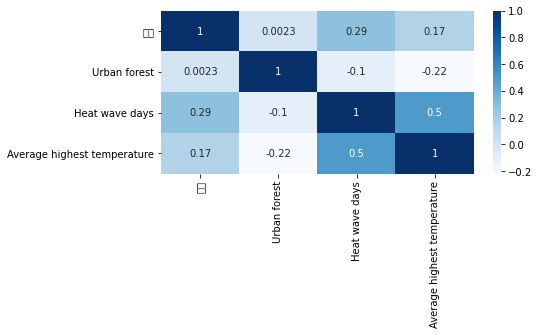

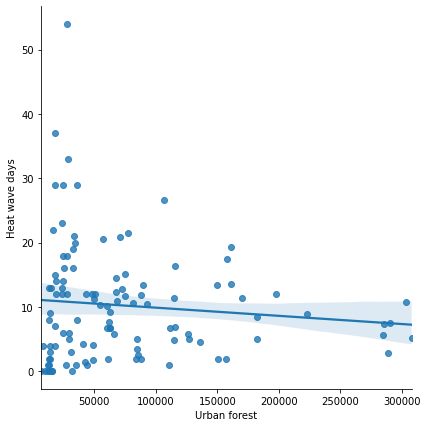

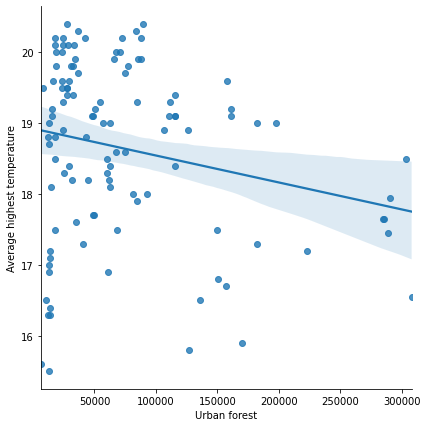

In [ ]:
plt.figure(figsize=(7,3))
sns.heatmap(data = df_hot_merge.corr(), annot=True, cmap='Blues')

sns.pairplot(df_hot_merge, x_vars=['Urban forest'], y_vars=['Heat wave days'], kind='reg', height=6)
sns.pairplot(df_hot_merge, x_vars=['Urban forest'], y_vars=['Average highest temperature'], kind='reg', height=6)

### 열대야 일수와 상관관계

In [ ]:
df_hotnights=pd.read_excel('기후데이터.xlsx', sheet_name='열대야일수_지역별')
df_hotnights

,시도,연도,열대야일수,평균 최고 기온
0,서울특별시,2005,11.00,16.40
1,서울특별시,2006,10.00,17.20
2,서울특별시,2007,14.00,17.50
3,서울특별시,2008,9.00,17.30
4,서울특별시,2009,4.00,17.20
...,...,...,...,...
267,강원도,2017,4.85,17.65
268,강원도,2018,10.65,17.50
269,강원도,2019,7.20,18.50
270,강원도,2020,4.20,17.95


In [ ]:
df_nights_merge=pd.merge(df_forest_total, df_hotnights, how='left',on=['시도', '연도'])
df_nights_merge

,시도,연도,도시림,열대야일수,평균 최고 기온
0,서울특별시,2007,17972.00,14.0,17.5
1,서울특별시,2009,13713.88,4.0,17.2
2,서울특별시,2011,14061.00,4.0,16.4
3,서울특별시,2013,12777.00,23.0,16.9
4,서울특별시,2015,13254.00,12.0,18.7
...,...,...,...,...,...
114,제주특별자치도,2011,84668.00,25.3,19.3
115,제주특별자치도,2013,89387.00,44.5,20.4
116,제주특별자치도,2015,87668.00,12.5,19.9
117,제주특별자치도,2017,87778.00,41.5,20.2


In [ ]:
df_nights_merge.rename(columns={'도시림':'Urban forest', '열대야일수':'Tropical night days', '평균 최고 기온':'Average highest temperature'}, inplace=True)

In [ ]:
import plotly.express as px

fig = px.scatter(
    df_nights_merge, x='Urban forest', y='Tropical night days', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 46020 missing from current font.



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 46020 missing from current font.



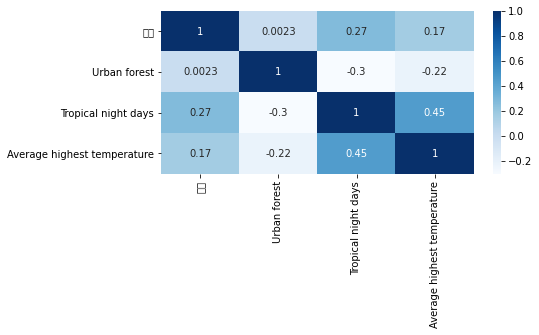

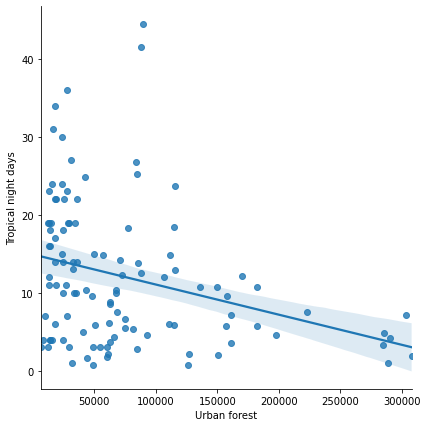

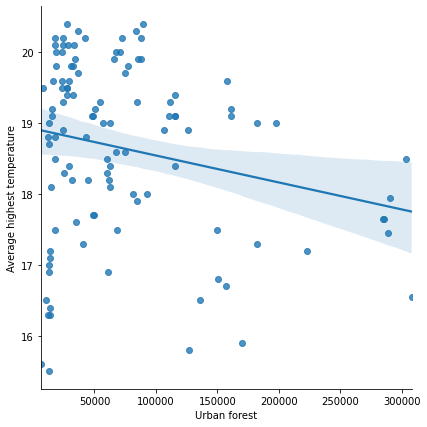

In [ ]:
plt.figure(figsize=(7,3))
sns.heatmap(data = df_nights_merge.corr(), annot=True, cmap='Blues')

#sns.set(rc={'axes.facecolor':'#F6F6F6', 'figure.facecolor':'#F6F6F6'})
palette=['#6EB9AB']
sns.pairplot(df_nights_merge, x_vars=['Urban forest'], y_vars=['Tropical night days'], kind='reg', height=6, palette=palette)
sns.pairplot(df_nights_merge, x_vars=['Urban forest'], y_vars=['Average highest temperature'], kind='reg', height=6)
